### Objective 

**Clean Numerical**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

> retrieve data

In [2]:
data = pd.read_csv('cache/1-all_cat_clean.csv')
data.shape

(95412, 440)

In [3]:
categorical = data.select_dtypes(object)
numerical = data.select_dtypes(exclude=['object'])
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
y = data[['TARGET_B', 'TARGET_D']]
numerical

,NOEXCH,DOMAIN_B,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,2,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,0,1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0

In [4]:
nulls_percent_df = pd.DataFrame(numerical.isna().sum()*100/len(numerical)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
display(nulls_percent_df[nulls_percent_df['nulls_percentage']>0].head(60))

,column_name,nulls_percentage
5,AGE,24.802960
6,NUMCHLD,87.018404
7,INCOME,22.309563
8,WEALTH1,46.882992
10,MBCRAFT,55.395548
11,MBGARDEN,55.395548
12,MBBOOKS,55.395548
13,MBCOLECT,55.458433
14,MAGFAML,55.395548
15,MAGFEM,55.395548


In [5]:
drop_list = []

>> ADATEs

In [6]:
numerical['ADATE_14'].value_counts()

ADATE_14
9506.0    76381
9504.0      164
Name: count, dtype: int64

In [7]:
adate_columns = [col for col in numerical if 'ADATE' in col]
# check maxdate
numerical['MAXADATE'].value_counts()
## can be dropped

MAXADATE
9702    95014
9612      333
9611       56
9701        8
9608        1
Name: count, dtype: int64

In [8]:
drop_list = drop_list + adate_columns

>> rdates

same as adate

In [9]:
numerical['RDATE_3'].value_counts()

RDATE_3
9606.0    105
9607.0     69
9704.0     21
9608.0     14
9605.0      7
9609.0      7
9703.0      4
9610.0      3
9705.0      3
9806.0      2
9802.0      2
9804.0      2
9612.0      2
9803.0      1
Name: count, dtype: int64

In [10]:
rdate_columns = [col for col in numerical if 'RDATE' in col]
drop_list = drop_list + rdate_columns

- same for amnt

In [11]:
amnt_columns = [col for col in numerical if 'AMNT_' in col]
drop_list = drop_list + amnt_columns

> filling null values

In [12]:
columns_with_0 = []
columns_with_distribution = []

>> age

In [13]:
numerical['AGE'].value_counts(dropna=False)

AGE
NaN     23665
50.0     1930
76.0     1885
72.0     1813
68.0     1809
        ...  
9.0         1
6.0         1
10.0        1
8.0         1
15.0        1
Name: count, Length: 97, dtype: int64

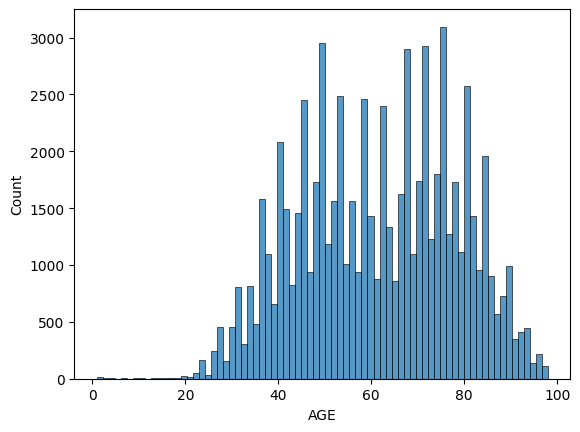

In [14]:
sns.histplot(numerical['AGE'])
plt.show()

In [15]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))
## could use a model here 

In [16]:
columns_with_distribution.append('AGE')

> > income 

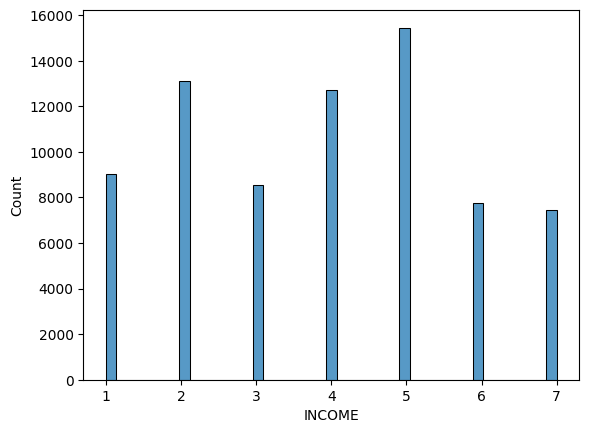

In [17]:
sns.histplot(numerical['INCOME'])
plt.show()

In [18]:
print(numerical['INCOME'].value_counts(dropna=False))


INCOME
NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: count, dtype: int64


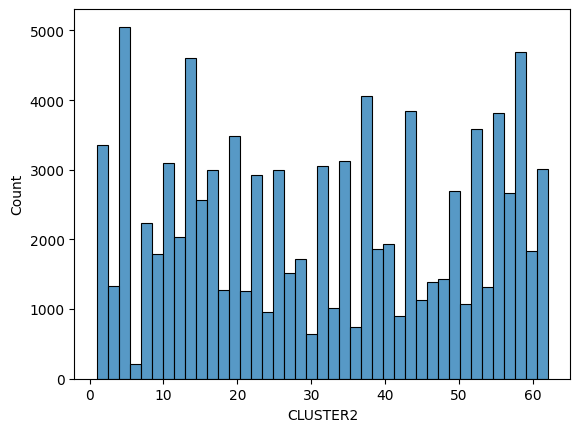

In [19]:
sns.histplot(numerical['CLUSTER2'])
plt.show()

In [20]:
numerical['CLUSTER2'].value_counts(dropna=False)

CLUSTER2
13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
46.0     644
29.0     569
40.0     369
6.0      211
NaN      132
Name: count, Length: 63, dtype: int64

In [21]:
columns_with_distribution.append('CLUSTER2')

>> check null values

In [22]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
6,NUMCHLD,83026
7,INCOME,21286
8,WEALTH1,44732
10,MBCRAFT,52854
11,MBGARDEN,52854
...,...,...
388,RAMNT_23,87553
389,RAMNT_24,77674
400,NEXTDATE,9973
401,TIMELAG,9973


>> WEALTH2

Wealth rating uses median family income and population statistics from each area to index relative wealth within each state.
The segments are denoted 0-9, with 9 being the highest income group and zero being the lowest. Each rating has a different meaning within each state.

In [23]:
numerical['WEALTH2'].value_counts(dropna=False)
# model! 

WEALTH2
NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: count, dtype: int64

In [24]:
columns_with_distribution.append('WEALTH2')

In [25]:
# same for WEALTH1
columns_with_distribution.append('WEALTH1')

>> TIMELAG

Number of months between first and second gift

In [26]:
data[['TIMELAG']].value_counts().sort_index()

TIMELAG
0.0         904
1.0        3920
2.0        6275
3.0        8485
4.0        8490
           ... 
89.0          1
90.0          1
442.0         1
1044.0        1
1088.0        1
Name: count, Length: 68, dtype: int64

In [27]:
filtered = numerical[numerical['TIMELAG'] == 0]
filtered[['FISTDATE', 'NEXTDATE', 'LASTDATE', 'TIMELAG']].reset_index()

,index,FISTDATE,NEXTDATE,LASTDATE,TIMELAG
0,55,9109,9109.0,9601,0.0
1,116,8703,8703.0,9512,0.0
2,125,9510,9510.0,9510,0.0
3,449,9210,9210.0,9603,0.0
4,634,8703,8703.0,9602,0.0
...,...,...,...,...,...
899,94756,9602,9602.0,9603,0.0
900,94762,9009,9009.0,9602,0.0
901,94865,9302,9302.0,9601,0.0
902,95165,9411,9411.0,9601,0.0


> > > 0 seems to mean there's no second gift-- fill all na with 0

In [28]:
columns_with_0.append('TIMELAG')

In [29]:
# also drop NEXTDATE
drop_list.append('NEXTDATE')

In [30]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
6,NUMCHLD,83026
7,INCOME,21286
8,WEALTH1,44732
10,MBCRAFT,52854
11,MBGARDEN,52854
...,...,...
388,RAMNT_23,87553
389,RAMNT_24,77674
400,NEXTDATE,9973
401,TIMELAG,9973


>> NUMCHLD

In [31]:
numerical['NUMCHLD'].value_counts(dropna=False)

NUMCHLD
NaN    83026
1.0     7792
2.0     3110
3.0     1101
4.0      316
5.0       59
6.0        7
7.0        1
Name: count, dtype: int64

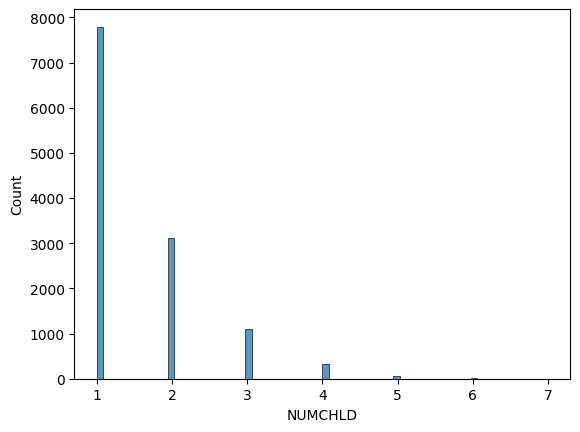

In [32]:
sns.histplot(numerical['NUMCHLD'])
plt.show()

>> I am assuming that they all have kids (this is not my generatin ;)), therefore filling the nan's randomly but based on the given distribution

In [33]:
numerical['NUMCHLD'].value_counts(dropna=False)

NUMCHLD
NaN    83026
1.0     7792
2.0     3110
3.0     1101
4.0      316
5.0       59
6.0        7
7.0        1
Name: count, dtype: int64

In [34]:
columns_with_distribution.append('NUMCHLD')

>> INCOME

In [35]:
numerical['INCOME'].value_counts(dropna=False)

INCOME
NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: count, dtype: int64

In [36]:
columns_with_distribution.append('INCOME')

>> pub and mag   
- The following variables indicate the number of
                            known times the donor has responded to other
                            types of mail order offers.


In [37]:
numerical['MBBOOKS'].value_counts(dropna=False)

MBBOOKS
NaN    52854
0.0    21299
1.0    10371
2.0     4664
3.0     2465
4.0     1469
5.0      901
6.0      538
9.0      325
7.0      325
8.0      201
Name: count, dtype: int64

- based on the definition I am replacing with 0

In [38]:
mail_columns = [col for col in numerical if ('MB' in col or 'MA' in col or 'PUB' in col) and col not in ['MAXADATE', 'MAXRDATE']]
columns_with_0 = columns_with_0 + mail_columns

> ADI and MSA   
- they have the same number of nulls, based on value replace with 0

In [39]:
numerical['MSA'].value_counts()

MSA
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: count, Length: 298, dtype: int64

In [40]:
numerical['ADI'].value_counts()

ADI
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: count, Length: 204, dtype: int64

In [41]:
drop_list.append('MSA')
drop_list.append('ADI')

> execute selected nan fill

In [42]:
# Function that fills nan values of given columns based on their distrubution 
def fill_nan_random_but_dist(dataframe, columns):
    for col in columns:
        # Compute distribution of non-missing values
        distribution = dataframe[col].value_counts(normalize=True)
        
        # Generate random numbers based on the distribution
        num_missing = dataframe[col].isnull().sum()
        random_fill = np.random.choice(distribution.index, size=num_missing, p=distribution.values)
        
        # Replace missing values with generated random numbers
        dataframe.loc[dataframe[col].isnull(), col] = random_fill

    return dataframe

In [43]:
numerical = fill_nan_random_but_dist(numerical, columns_with_distribution)

In [44]:
numerical.drop(columns=drop_list, inplace=True)

In [45]:
numerical[columns_with_0] = numerical[columns_with_0].fillna(0)

In [46]:
numerical.isna().sum().sum()

0

> save data

In [47]:
data = pd.concat([categorical, numerical, y], axis=1)

In [48]:
data.to_csv('./cache/2-all_cat_clean.csv', index=False)
numerical.to_csv('./cache/2-clean_numerical.csv', index=False)